<a href="https://colab.research.google.com/github/KosukhaOlexandr/reactions_prediction/blob/main/rp_concat_to_pos_neg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


All data files should be listed here

Note: in future this may be implemented with os module and name conventions like 

`for "tsn_reactions_dataset*.csv" in folder`

In [2]:
import pandas as pd

with open('/content/drive/MyDrive/reaction_prediction/tsn_reactions_dataset.csv') as f:
  data = pd.read_csv(f, index_col = 0)
  
with open('/content/drive/My Drive/reaction_prediction/tsn_reactions_dataset_from_2_jul.csv') as f:
  data_from_2_jul = pd.read_csv(f, index_col = 0)

with open('/content/drive/My Drive/reaction_prediction/tsn_reactions_dataset_from_Sep_21.csv') as f:
  data_from_Sep_21 = pd.read_csv(f, index_col = 0)

In [3]:
data = pd.concat([data.reset_index(drop=True), data_from_2_jul.reset_index(drop=True), data_from_Sep_21.reset_index(drop=True)], axis = 0)

In [4]:
data = data.reset_index(drop=True)
data

,msg_text,clown_face,thumbs_up,thumbs_down,red_heart,fire,smiling_face_with_hearts,clapping_hands,beaming_face_with_smiling_eyes,thinking_face,exploding_head,face_screaming_in_fear,face_with_symbols_on_mouth,crying_face,party_popper,star-struck,face_vomiting,pile_of_poo
0,чий борщ у п’ятницю липня юнеско вирішить долю...,0.000000,0.046779,0.000000,0.720624,0.004455,0.019677,0.004270,0.142565,0.013922,0.036570,0.000000,0.007611,0.001114,0.002413,0.0,0.000000,0.000000
1,зруйнований міст у демидові на київщині планую...,0.000000,0.807922,0.002555,0.081772,0.011499,0.004259,0.001278,0.002981,0.058773,0.000000,0.000000,0.000000,0.024702,0.000000,0.0,0.001278,0.002981
2,безперечно головне слово сьогодні зміїний мабу...,0.000000,0.750110,0.002428,0.168874,0.015673,0.031788,0.023179,0.001987,0.001987,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.003974,0.000000
3,прокремлівське видання общественная служба нов...,0.000000,0.081781,0.001136,0.001817,0.006815,0.002953,0.011586,0.814630,0.004998,0.034757,0.000000,0.006134,0.000000,0.000000,0.0,0.033394,0.000000
4,продовжується відвантаження боєприпасів продов...,0.000000,0.453347,0.006853,0.007380,0.007380,0.000000,0.002636,0.003163,0.033737,0.055351,0.000000,0.397470,0.018977,0.000000,0.0,0.013706,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32378,перша леді олена зеленська та прем єр міністр ...,0.001813,0.804922,0.002073,0.149223,0.003886,0.017358,0.010881,0.001813,0.000000,0.000000,0.000000,0.000000,0.000000,0.001295,0.0,0.005699,0.001036
32379,українські захисники поцілили у військову коме...,0.002022,0.771797,0.000505,0.043973,0.155168,0.007834,0.017943,0.000000,0.000253,0.000000,0.000505,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
32380,росіяни обстріляли заес пошкоджено обладнання ...,0.009682,0.011720,0.004586,0.000000,0.000000,0.000764,0.001019,0.002548,0.000000,0.000000,0.102166,0.837197,0.008408,0.000000,0.0,0.006369,0.015541
32381,тсн ua пропонує дізнатися головні події ночі я...,0.000000,0.806780,0.000000,0.088136,0.005085,0.000000,0.003390,0.037288,0.049153,0.000000,0.010169,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [5]:
data.shape

(32383, 18)

# Data Preparation

For this model we will divide reactions into two categories: 
- positive - 1 
- negative - 0

Positive consist of 👍, 👎, ❤, 🔥, 🥰, 👏, 😁, 🤯, 🎉, 🤩

Negative consist of 🤡, 🤔, 😱, 🤬, 😢, 🤮, 💩

data.columns

In [6]:
pos_reacts = ['thumbs_up', 'thumbs_down', 'red_heart', 'fire', 'smiling_face_with_hearts', 'clapping_hands',
             'beaming_face_with_smiling_eyes', 'exploding_head', 'party_popper', 'star-struck']
neg_reacts = ['clown_face', 'thinking_face', 'face_screaming_in_fear', 'face_with_symbols_on_mouth', 'crying_face',
              'face_vomiting', 'pile_of_poo']

In [7]:
data['pos_sum'] = data[pos_reacts].sum(axis = 1)
data['neg_sum'] = data[neg_reacts].sum(axis = 1)
data.loc[:, ['pos_sum', 'neg_sum']]

,pos_sum,neg_sum
0,0.977353,0.022647
1,0.912266,0.087734
2,0.994040,0.005960
3,0.955475,0.044525
4,0.536110,0.463890
...,...,...
32378,0.991451,0.008549
32379,0.997220,0.002780
32380,0.020637,0.979363
32381,0.940678,0.059322


In [8]:
data.loc[:, ['pos_sum', 'neg_sum']] = data.loc[:, ['pos_sum', 'neg_sum']].applymap(lambda x: 1 if x > 0.5 else 0)

In [9]:
data.loc[:,['pos_sum','neg_sum']].sum(axis = 0)

pos_sum    20118
neg_sum    12265
dtype: int64

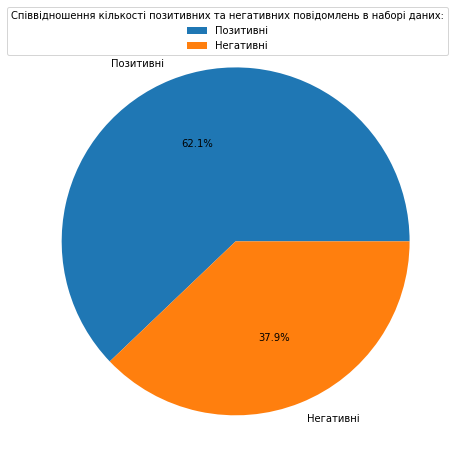

In [10]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(data.loc[:,['pos_sum','neg_sum']].sum(axis = 0))
mylabels = ['Позитивні', 'Негативні']

plt.figure(figsize=(11, 8))
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend(bbox_to_anchor =(1, 1.05),title = "Співвідношення кількості позитивних та негативних повідомлень в наборі даних:")
plt.savefig('pos_neg_pie.png')

plt.show()

Making one column for reaction type: 1 for positive, 0 for negative

In [11]:
data['reaction_type'] = data['pos_sum']
data = data.loc[:, ['msg_text', 'reaction_type']]

In [12]:
data.to_csv('/content/drive/My Drive/reaction_prediction/concatenated_pos_neg.csv')